<a href="https://colab.research.google.com/github/Soniprincy/My-Practice/blob/main/BankDataLOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About the dataset

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed i

bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric).

Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes: 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

EURIBOR 3 Month Rate is a daily financial indicator that represents the interest rate at which Eurozone banks borrow funds from each other for a period of three months. EURIBOR stands for "Euro Interbank Offered Rate" and is calculated and published daily by the European Money Markets Institute (EMMI).

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('/content/bank-additional-full_final (1).csv',sep=';')

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
df.shape

(41199, 21)

In [10]:
for i in df.columns:
    print(df[i].value_counts())

age
31.0    1947
32.0    1846
33.0    1833
36.0    1780
35.0    1759
        ... 
89.0       2
98.0       2
91.0       2
87.0       1
95.0       1
Name: count, Length: 78, dtype: int64
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1726
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
marital
married     24934
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5249
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
default
no         32595
unknown     8597
yes            3
Name: count, dtype: int64
housing
yes        21584
no         18622
unknown 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [12]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
df.isnull().sum().sum()

76

<ipython-input-14-eef84e7ff8f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


<Axes: xlabel='age', ylabel='Density'>

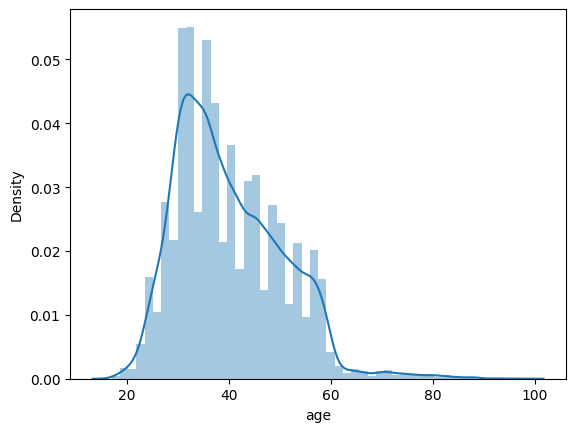

In [14]:
sns.distplot(df["age"])

In [15]:
df['y']

0         no
1         no
2         no
3         no
4         no
        ... 
41194     no
41195     no
41196     no
41197    NaN
41198     no
Name: y, Length: 41199, dtype: object

In [16]:
df['y'] = np.where(df['y']=='yes',1,0)
df['y']

0        0
1        0
2        0
3        0
4        0
        ..
41194    0
41195    0
41196    0
41197    0
41198    0
Name: y, Length: 41199, dtype: int64

In [17]:
df['y'].dtype

dtype('int64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [19]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


## Boxplot

Using boxplot we will be visualizing the outliers,after that we will be using IQR method and handling the outliers.
with the help of boxplot we can visualize that 'age','duration','campaign','cons.conf.idx' columns has a outlier.1

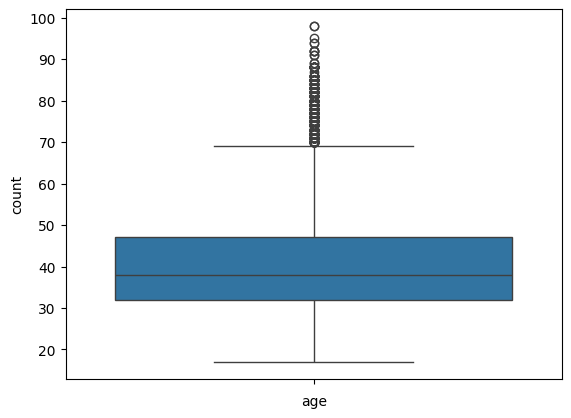

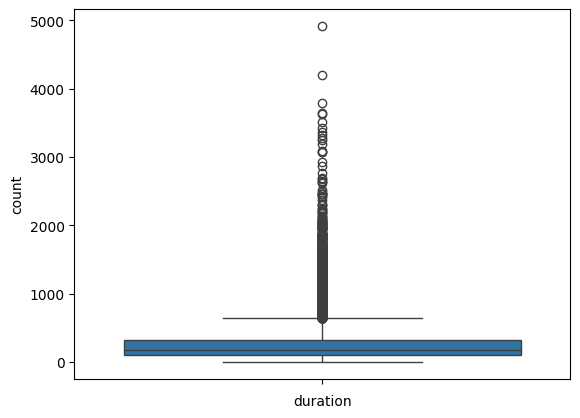

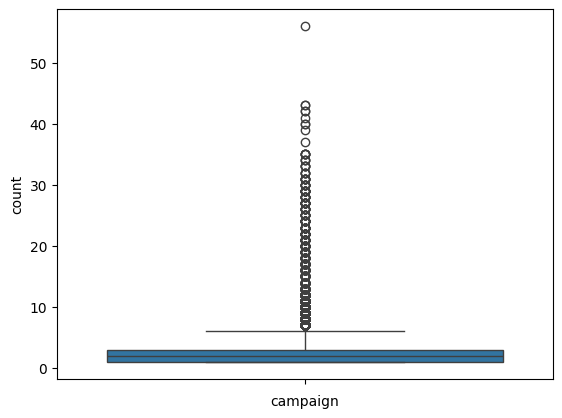

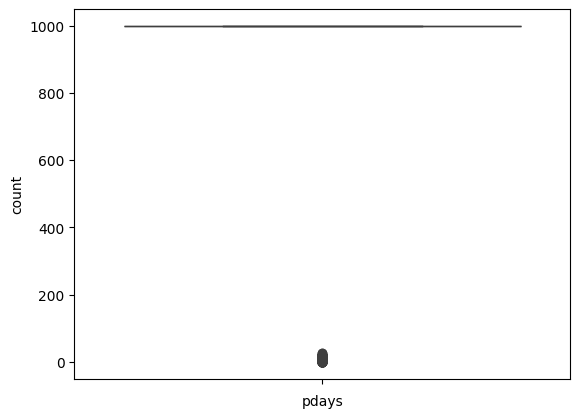

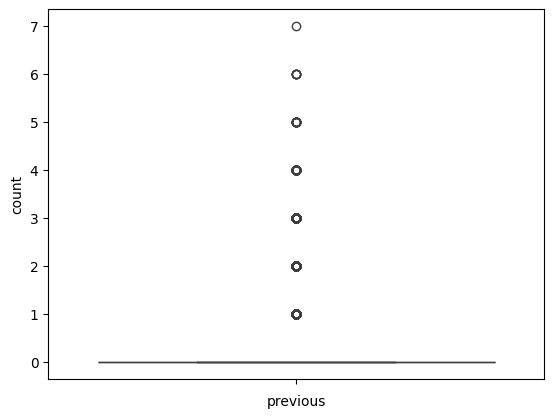

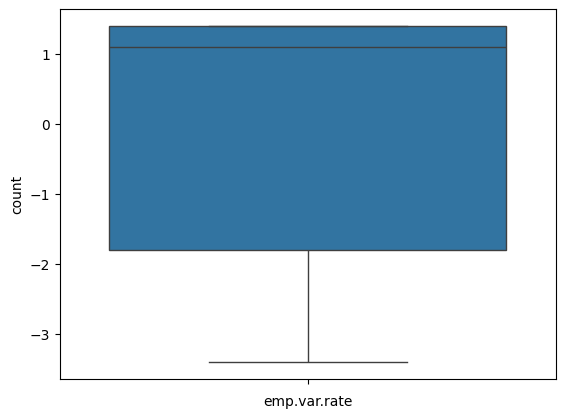

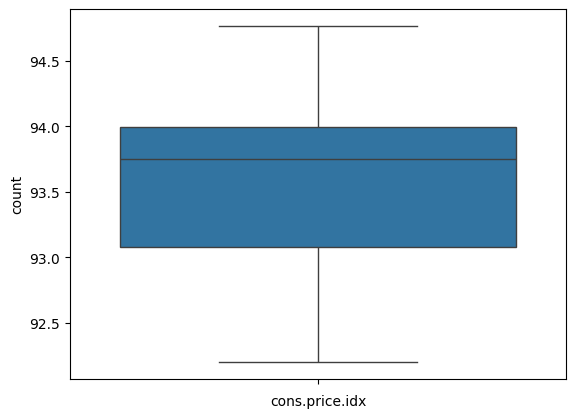

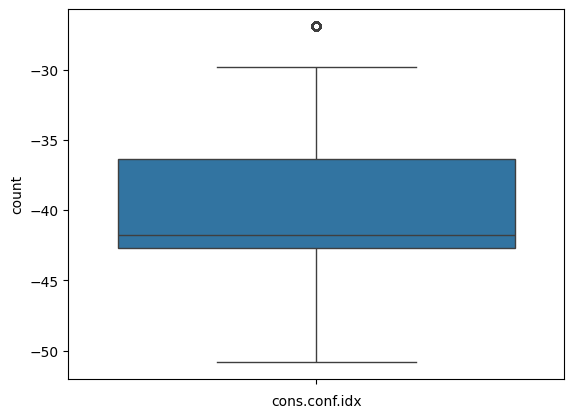

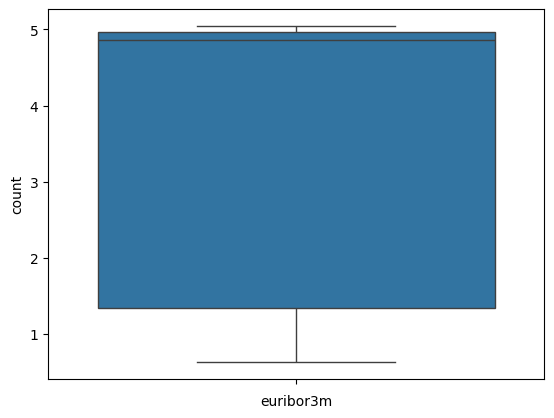

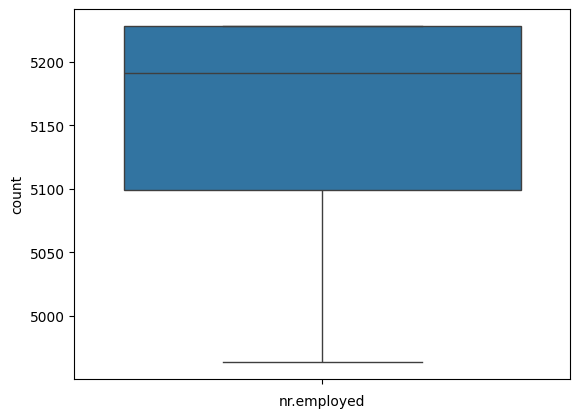

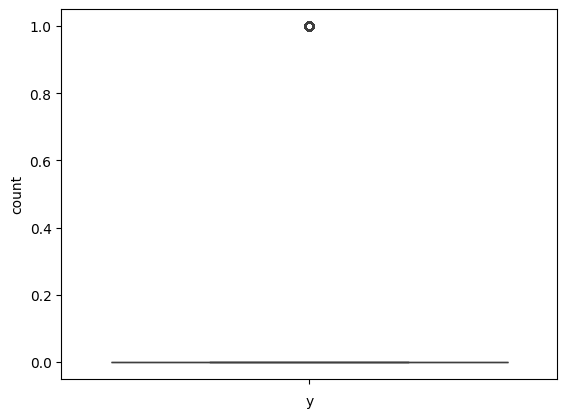

In [20]:
# outlier detection
# boxplot - for outlier visualization

for col in df.columns:
    if (df[col].dtypes == 'int64' or df[col].dtypes == 'float64'):
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

## Removing Outliers

In [21]:
# age, duration, campaign, pdays, previous, cons.conf.idx

Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)
IQR = Q3 - Q1
df = df[(df['age']<=(Q3 + 1.5*IQR))&(df['age']>=(Q1 - 1.5*IQR))]

Q1 = df.duration.quantile(0.25)
Q3 = df.duration.quantile(0.75)
IQR = Q3 - Q1
df = df[(df['duration']<=(Q3 + 1.5*IQR))&(df['duration']>=(Q1 - 1.5*IQR))]

Q1 = df.campaign.quantile(0.25)
Q3 = df.campaign.quantile(0.75)
IQR = Q3 - Q1
df = df[(df['campaign']<=(Q3 + 1.5*IQR))&(df['campaign']>=(Q1 - 1.5*IQR))]

Q1 = df['cons.conf.idx'].quantile(0.25)
Q3 = df['cons.conf.idx'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['cons.conf.idx']<=(Q3 + 1.5*IQR))&(df['cons.conf.idx']>=(Q1 - 1.5*IQR))]

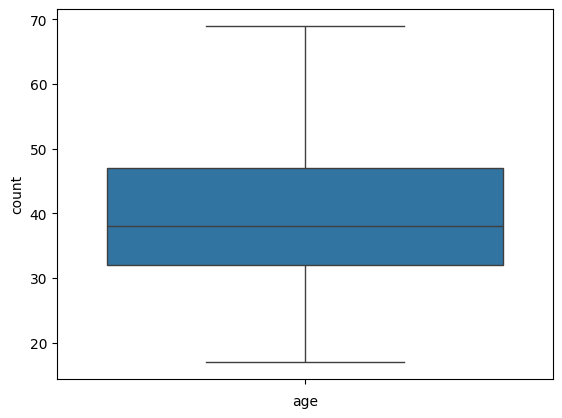

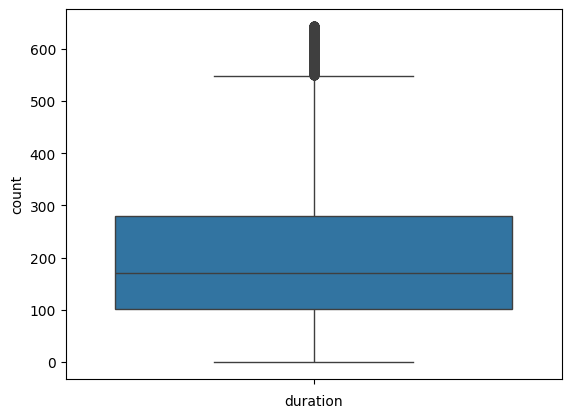

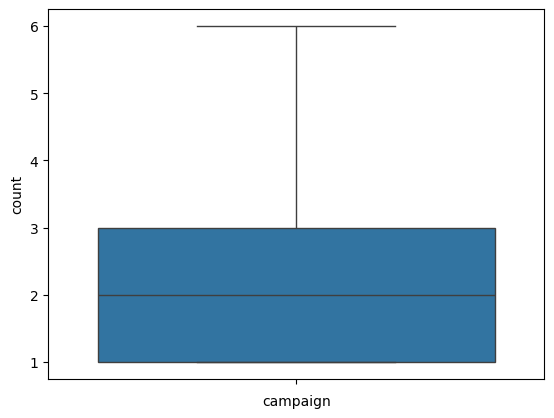

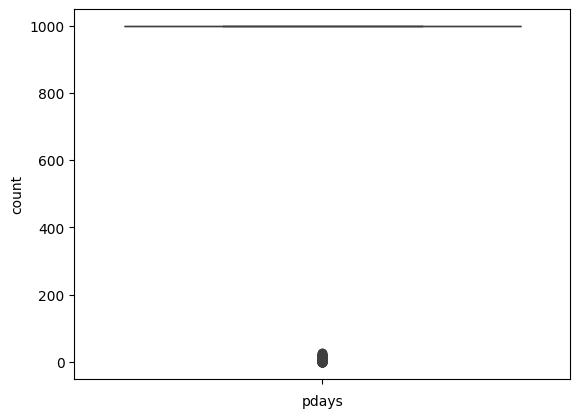

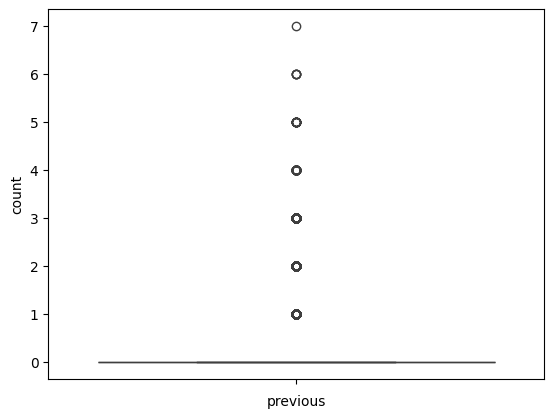

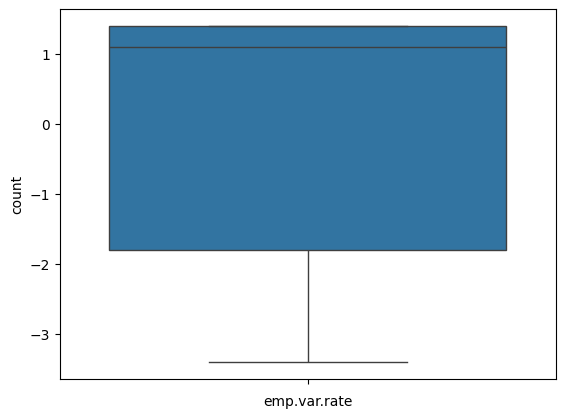

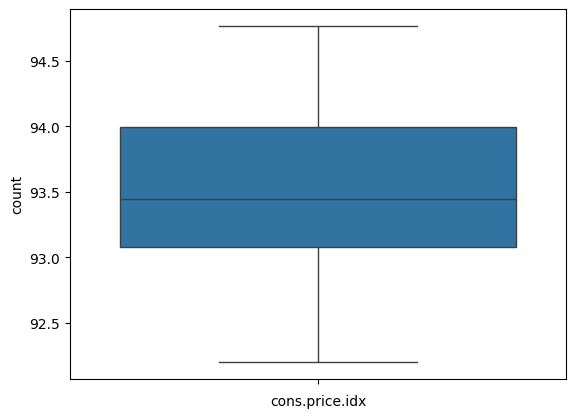

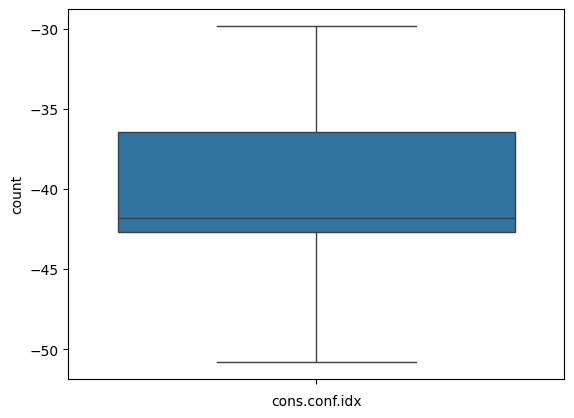

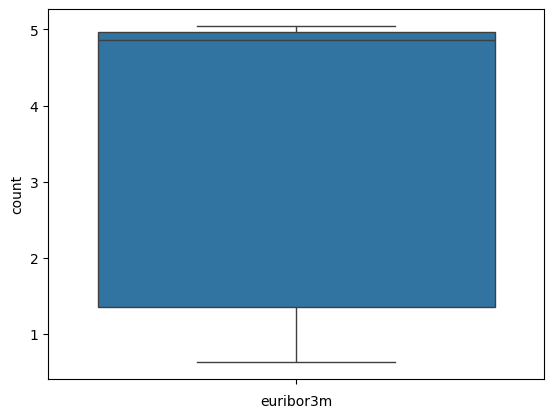

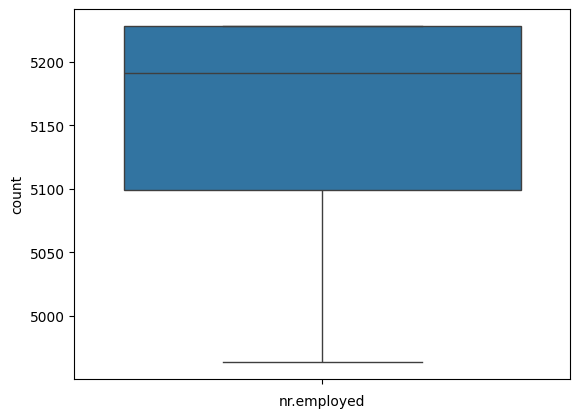

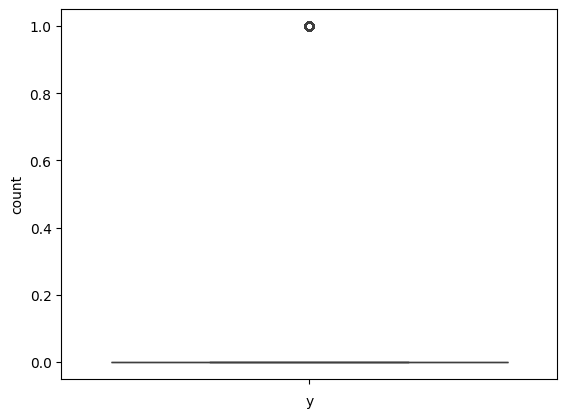

In [22]:
for col in df.columns:
    if (df[col].dtypes == 'int64' or df[col].dtypes == 'float64'):
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()

In [23]:
df['age'].nunique()

53

In [24]:
df.shape

(35176, 21)

In [25]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


## Binning

In [26]:
# cutting age column of df into bins.
bins = [0,50,100]
df['age'] = pd.cut(df['age'],bins)
df['age'] = df['age'].astype(str)

In [27]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 100]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(50, 100]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(0, 50]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"(0, 50]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"(50, 100]",services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [28]:
df['age'].value_counts()

age
(0, 50]      29410
(50, 100]     5766
Name: count, dtype: int64

In [29]:
df.corr(numeric_only=True)

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
duration,1.000000,-0.056893,-0.073909,0.045916,-0.051520,0.001185,-0.002758,-0.059965,-0.078609,0.268697
campaign,-0.056893,1.000000,0.042119,-0.057014,0.089151,0.066982,-0.005851,0.074389,0.084543,-0.054587
pdays,-0.073909,0.042119,1.000000,-0.574394,0.261045,0.064597,-0.072240,0.288819,0.368915,-0.379771
previous,0.045916,-0.057014,-0.574394,1.000000,-0.420139,-0.200582,-0.088658,-0.453300,-0.502056,0.264926
emp.var.rate,-0.051520,0.089151,0.261045,-0.420139,1.000000,0.767748,0.309296,0.972556,0.901906,-0.336070
cons.price.idx,0.001185,0.066982,0.064597,-0.200582,0.767748,1.000000,0.148943,0.681502,0.503828,-0.142035
cons.conf.idx,-0.002758,-0.005851,-0.072240,-0.088658,0.309296,0.148943,1.000000,0.373474,0.200454,0.041241
euribor3m,-0.059965,0.074389,0.288819,-0.453300,0.972556,0.681502,0.373474,1.000000,0.943611,-0.345697
nr.employed,-0.078609,0.084543,0.368915,-0.502056,0.901906,0.503828,0.200454,0.943611,1.000000,-0.404753
y,0.268697,-0.054587,-0.379771,0.264926,-0.336070,-0.142035,0.041241,-0.345697,-0.404753,1.000000


In [30]:
df.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

## Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

In [33]:
for i in df.columns:
    if ((df[i].dtype == 'object') & (i != 'y')):
        df[i] = le.fit_transform(df[i])

In [34]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,1,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,1,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0,0,1,6,0,2,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41182,0,10,2,0,0,2,0,0,7,0,...,1.0,9.0,1.0,2,-1.1,94.767,-50.8,1.028,4963.6,0
41184,0,1,1,5,0,0,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,1,5,1,6,0,2,0,0,7,0,...,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35176 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             35176 non-null  int64  
 1   job             35176 non-null  int64  
 2   marital         35176 non-null  int64  
 3   education       35176 non-null  int64  
 4   default         35176 non-null  int64  
 5   housing         35176 non-null  int64  
 6   loan            35176 non-null  int64  
 7   contact         35176 non-null  int64  
 8   month           35176 non-null  int64  
 9   day_of_week     35176 non-null  int64  
 10  duration        35176 non-null  float64
 11  campaign        35176 non-null  float64
 12  pdays           35176 non-null  float64
 13  previous        35176 non-null  float64
 14  poutcome        35176 non-null  int64  
 15  emp.var.rate    35176 non-null  float64
 16  cons.price.idx  35176 non-null  float64
 17  cons.conf.idx   35176 non-null  floa

In [36]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,1,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,1,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0


## VIF (Variance Inflation Factor)
 remove column until VIF < 5

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
x = df.drop('y',axis=1)
VIF = pd.DataFrame()
VIF['Features'] = x.columns
VIF['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF

,Features,VIF
0,age,1.286091
1,job,2.102585
2,marital,5.102803
3,education,4.554388
4,default,1.388194
5,housing,2.212322
6,loan,1.208221
7,contact,2.944622
8,month,6.682403
9,day_of_week,3.098168


In [39]:
df = df.drop('nr.employed',axis = 1)

In [40]:
x = df.drop('y',axis=1)
VIF = pd.DataFrame()
VIF['Features'] = x.columns
VIF['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF

,Features,VIF
0,age,1.283994
1,job,2.102382
2,marital,5.101849
3,education,4.552683
4,default,1.385439
5,housing,2.211991
6,loan,1.208174
7,contact,2.445903
8,month,5.778944
9,day_of_week,3.097315


In [41]:
df = df.drop('cons.price.idx',axis = 1)

In [42]:
x = df.drop('y',axis=1)
VIF = pd.DataFrame()
VIF['Features'] = x.columns
VIF['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF

,Features,VIF
0,age,1.278021
1,job,2.096917
2,marital,5.056276
3,education,4.504006
4,default,1.383653
5,housing,2.210197
6,loan,1.207618
7,contact,2.348331
8,month,5.708546
9,day_of_week,3.084754


In [43]:
df = df.drop('pdays',axis = 1)

In [44]:
x = df.drop('y',axis=1)
VIF = pd.DataFrame()
VIF['Features'] = x.columns
VIF['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF

,Features,VIF
0,age,1.274717
1,job,2.093453
2,marital,5.014482
3,education,4.452427
4,default,1.381688
5,housing,2.206039
6,loan,1.207467
7,contact,2.268827
8,month,5.630301
9,day_of_week,3.073139


In [45]:
df = df.drop('euribor3m',axis = 1)

In [46]:
x = df.drop('y',axis=1)
VIF = pd.DataFrame()
VIF['Features'] = x.columns
VIF['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF

,Features,VIF
0,age,1.259460
1,job,2.085184
2,marital,4.971766
3,education,4.269465
4,default,1.379175
5,housing,2.194997
6,loan,1.207136
7,contact,2.251905
8,month,5.269694
9,day_of_week,3.026761


In [47]:
df = df.drop('cons.conf.idx',axis = 1)

In [48]:
x = df.drop('y',axis=1)
VIF = pd.DataFrame()
VIF['Features'] = x.columns
VIF['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF

,Features,VIF
0,age,1.247822
1,job,2.058985
2,marital,4.488969
3,education,4.016190
4,default,1.344649
5,housing,2.115051
6,loan,1.200961
7,contact,2.241299
8,month,4.607984
9,day_of_week,2.890443


In [49]:
df = df.drop('poutcome',axis = 1)

In [50]:
x = df.drop('y',axis=1)
VIF = pd.DataFrame()
VIF['Features'] = x.columns
VIF['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
VIF

,Features,VIF
0,age,1.229031
1,job,2.042486
2,marital,4.231967
3,education,3.800728
4,default,1.338359
5,housing,2.085805
6,loan,1.199105
7,contact,2.225352
8,month,4.497906
9,day_of_week,2.809804


In [51]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,y
0,1,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,1.1,0
1,1,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,1.1,0
2,0,7,1,3,0,2,0,1,6,1,226.0,1.0,0.0,1.1,0
3,0,0,1,1,0,0,0,1,6,1,151.0,1.0,0.0,1.1,0
4,1,7,1,3,0,0,2,1,6,1,307.0,1.0,0.0,1.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0,0,1,6,0,2,0,0,7,0,281.0,1.0,0.0,-1.1,1
41182,0,10,2,0,0,2,0,0,7,0,112.0,1.0,1.0,-1.1,0
41184,0,1,1,5,0,0,0,0,7,0,383.0,1.0,0.0,-1.1,0
41185,1,5,1,6,0,2,0,0,7,0,189.0,2.0,0.0,-1.1,0


## Seperate Features

In [52]:
x = df.drop('y',axis=1)
y = pd.DataFrame(df['y'])

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

## Splitting Data

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

## Building Model

In [55]:
lr = LogisticRegression()

## Training Model

In [56]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Testing Model

In [57]:
y_pred = lr.predict(x_test)

In [58]:
accuracy_score(y_test, y_pred)

0.9248152359295054

In [59]:
confusion_matrix(y_test, y_pred)

array([[6398,  101],
       [ 428,  109]])

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6499
           1       0.52      0.20      0.29       537

    accuracy                           0.92      7036
   macro avg       0.73      0.59      0.63      7036
weighted avg       0.91      0.92      0.91      7036

